<a href="https://colab.research.google.com/github/g-sarrazin/us-yield-curves/blob/main/1_Indices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  12 of 12 completed


,Ticker,Name,Price Now,Price 1W Ago,Price 3M Ago,Change 1W %,Change 3M %
0,SPY,S&P 500,597.0000,599.1400,NaN,-0.3572,NaN
1,QQQ,Nasdaq 100,526.9600,529.9200,NaN,-0.5586,NaN
2,DIA,Dow Jones,422.8100,428.3800,NaN,-1.3002,NaN
3,IWM,Russell 2000,208.8900,211.9000,NaN,-1.4205,NaN
4,^STOXX50E,Euro Stoxx 50,5290.4702,5430.1699,NaN,-2.5727,NaN
5,^STOXX,Stoxx 600,544.9400,553.6400,NaN,-1.5714,NaN
6,^GDAXI,DAX,23516.2305,24304.4609,NaN,-3.2432,NaN
7,^FCHI,CAC 40,7684.6802,7804.8701,NaN,-1.5399,NaN
8,^FTSE,FTSE 100,8850.5996,8837.9004,NaN,0.1437,NaN
9,^N225,Nikkei 225,37834.2500,37741.6094,NaN,0.2455,NaN


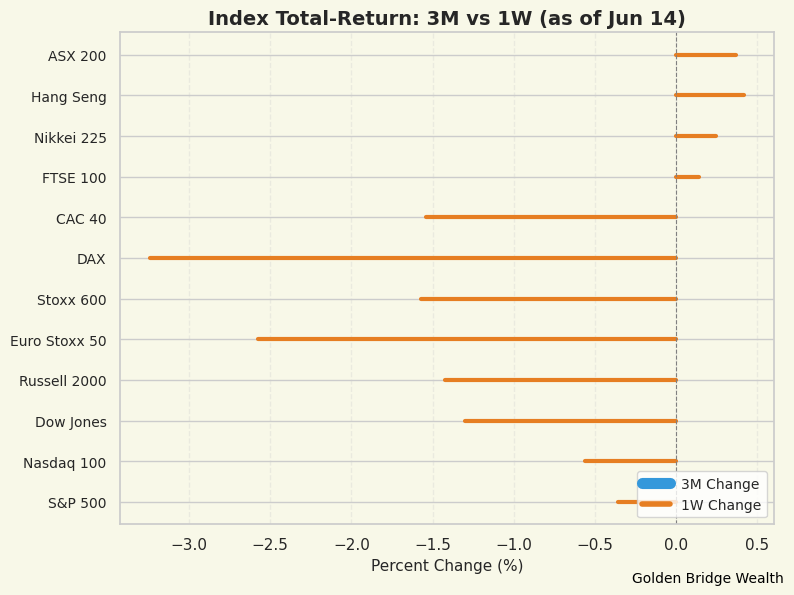

✅ Chart saved to:
/content/drive/My Drive/Colab Notebooks/newsletters/Market recap/index_performance_newsletter.png


In [1]:
# Install yfinance if not already installed
try:
    import yfinance as yf
except ImportError:
    import sys
    !{sys.executable} -m pip install yfinance --quiet
    import yfinance as yf

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import os

sns.set(style="whitegrid")

# 2) Date definitions
today    = datetime.today()
start_1w = today - timedelta(weeks=1)
start_3m = today - timedelta(days=90)

# 3) Tickers and display names
tickers = ["SPY","QQQ","DIA","IWM","^STOXX50E","^STOXX",
           "^GDAXI","^FCHI","^FTSE","^N225","^HSI","^AXJO"]
names   = {
    "SPY":"S&P 500","QQQ":"Nasdaq 100","DIA":"Dow Jones",
    "IWM":"Russell 2000","^STOXX50E":"Euro Stoxx 50",
    "^STOXX":"Stoxx 600","^GDAXI":"DAX","^FCHI":"CAC 40",
    "^FTSE":"FTSE 100","^N225":"Nikkei 225","^HSI":"Hang Seng",
    "^AXJO":"ASX 200"
}

# 4) Download total-return adjusted Close prices (with retry for holidays/weekends)
max_retries = 3
for _ in range(max_retries):
    df = yf.download(
        tickers,
        start=(start_3m - timedelta(days=1)).strftime('%Y-%m-%d'),
        end=(today + timedelta(days=1)).strftime('%Y-%m-%d'),
        auto_adjust=True
    )['Close']
    if not df.empty:
        break
    today -= timedelta(days=1)
    start_1w = today - timedelta(weeks=1)
    start_3m = today - timedelta(days=90)

# 5) Align & forward-fill
df = df.reindex(pd.date_range(start_3m, today), method='ffill')

# 6) Snapshot
price_now = df.iloc[-1]
price_1w   = df.loc[df.index.asof(start_1w)]
price_3m   = df.loc[df.index.asof(start_3m)]

# 7) Compute percent changes
pct1w = (price_now - price_1w) / price_1w * 100
pct3m = (price_now - price_3m) / price_3m * 100

# 8) Build aligned table row-by-row
rows = []
for t in tickers:
    rows.append({
        'Ticker':       t,
        'Name':         names[t],
        'Price Now':    price_now[t],
        'Price 1W Ago': price_1w[t],
        'Price 3M Ago': price_3m[t],
        'Change 1W %':  pct1w[t],
        'Change 3M %':  pct3m[t]
    })
perf_df = pd.DataFrame(rows)

# 9) Display the corrected data table
from IPython.display import display
display(perf_df.round(4))

# 10) Plot the chart
bg_color   = '#f8f8e8'
bar_color  = '#3498db'
line_color = '#e67e22'

y = np.arange(len(perf_df))
fig, ax = plt.subplots(figsize=(8,6), facecolor=bg_color)
ax.set_facecolor(bg_color)

# 3M bars
ax.barh(y, perf_df['Change 3M %'], height=0.4,
        color=bar_color, edgecolor='black')

# 1W lines
for i in range(len(perf_df)):
    ax.plot([0, perf_df.at[i,'Change 1W %']], [y[i], y[i]],
            color=line_color, linewidth=3,
            label='1W Change' if i == 0 else "")

# Formatting
ax.set_yticks(y)
ax.set_yticklabels(perf_df['Name'], fontsize=10)
ax.set_xlabel("Percent Change (%)", fontsize=11)
ax.set_title(f"Index Total-Return: 3M vs 1W (as of {today.strftime('%b %d')})",
             fontsize=14, weight='bold')
ax.axvline(0, color='gray', linestyle='--', linewidth=0.8)
ax.grid(axis='x', linestyle='--', alpha=0.3)

# Legend
custom = [
    Line2D([0],[0],color=bar_color, lw=8),
    Line2D([0],[0],color=line_color, lw=4)
]
ax.legend(custom, ['3M Change','1W Change'],
          fontsize=10, loc='lower right')

# Add 'Golden Bridge Wealth' text on bottom right
fig.text(0.99, 0.01, 'Golden Bridge Wealth', fontsize=10, color='black', ha='right', va='bottom')

# Define both possible save paths
path1 = "/content/drive/My Drive/Colab Notebooks/newsletters/Market recap/index_performance_newsletter.png"
path2 = "G:/Mon Drive/Colab Notebooks/newsletters/Market recap/index_performance_newsletter.png"

# Determine which directory exists, or create the default if neither does
if os.path.exists(os.path.dirname(path1)):
    save_path = path1
elif os.path.exists(os.path.dirname(path2)):
    save_path = path2
else:
    save_path = path1  # default to path1
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the figure
plt.tight_layout()
plt.savefig(save_path, dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()

print(f"✅ Chart saved to:\n{save_path}")


[*********************100%***********************]  8 of 8 completed


,Ticker,Name,Price Now,Price 1W Ago,Price 3M Ago,Change 1W %,Change 3M %
0,SPY,S&P 500,599.1400,589.3900,558.8987,1.6543,7.2001
1,QQQ,Nasdaq 100,529.9200,519.1100,472.0261,2.0824,12.2650
2,DIA,Dow Jones,428.3800,422.8500,418.1641,1.3078,2.4430
3,IWM,Russell 2000,211.9000,205.0700,200.3205,3.3306,5.7805
4,^STOXX50E,Euro Stoxx 50,5430.1699,5366.5898,5386.9800,1.1847,0.8017
5,GLD,Gold,305.1800,303.6000,266.0400,0.5204,14.7121
6,USO,Oil,71.3800,67.1500,70.8900,6.2993,0.6912
7,BTC-USD,Bitcoin,106355.9062,105652.1016,78532.0000,0.6662,35.4300


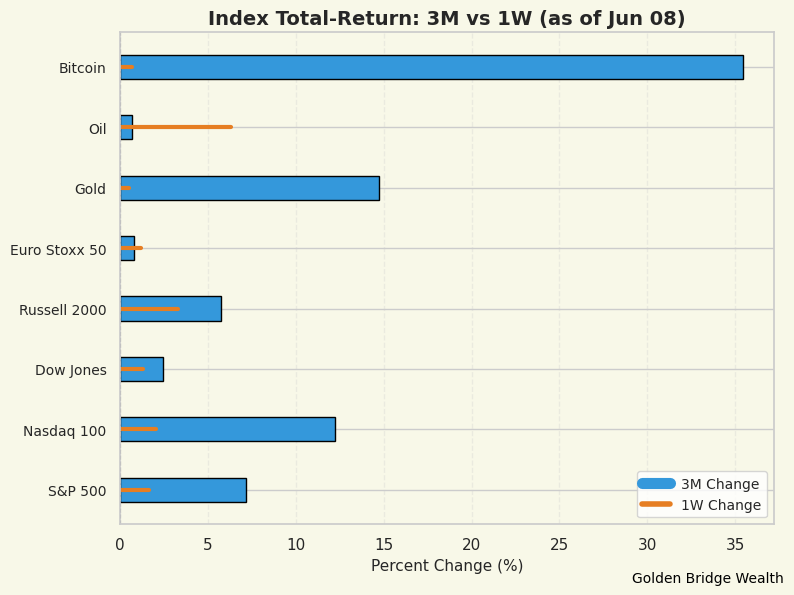

✅ Chart saved to:
/content/drive/My Drive/Colab Notebooks/newsletters/Market recap/index_performance_newsletter.png


In [ ]:
# Install yfinance if not already installed
try:
    import yfinance as yf
except ImportError:
    import sys
    !{sys.executable} -m pip install yfinance --quiet
    import yfinance as yf

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import os
import logging

# Suppress yfinance debug logging
logging.getLogger('yfinance').setLevel(logging.WARNING)

sns.set(style="whitegrid")

# Date definitions
today = datetime.today()
start_1w = today - timedelta(weeks=1)
start_3m = today - timedelta(days=90)

# Tickers and display names
tickers = ["SPY", "QQQ", "DIA", "IWM", "^STOXX50E", "GLD", "USO", "BTC-USD"]
names = {
    "SPY": "S&P 500",
    "QQQ": "Nasdaq 100",
    "DIA": "Dow Jones",
    "IWM": "Russell 2000",
    "^STOXX50E": "Euro Stoxx 50",
    "GLD": "Gold",
    "USO": "Oil",
    "BTC-USD": "Bitcoin"
}

# Download total-return adjusted Close prices (with retry for holidays/weekends)
max_retries = 3
for _ in range(max_retries):
    raw = yf.download(
        tickers,
        start=(start_3m - timedelta(days=1)).strftime('%Y-%m-%d'),
        end=(today + timedelta(days=1)).strftime('%Y-%m-%d'),
        auto_adjust=True
    )
    if not raw.empty:
        # extract the Close column (in case of multi-level DF)
        df = raw['Close'] if isinstance(raw.columns, pd.MultiIndex) else raw
        break
    # shift the window back if nothing downloaded
    today -= timedelta(days=1)
    start_1w = today - timedelta(weeks=1)
    start_3m = today - timedelta(days=90)

# --- NaN handling like in the first script ---
# Forward-fill and backward-fill to handle missing trading days
df = df.ffill().bfill()

# Function to normalize dates to UTC midnight (Yahoo Finance's timestamp format)
def to_utc_midnight(dt):
    return datetime(dt.year, dt.month, dt.day)

# Snapshot prices using UTC-normalized dates (to match Yahoo's timestamps)
price_now = df.iloc[-1]
price_1w = df.loc[df.index.asof(to_utc_midnight(start_1w))]
price_3m = df.loc[df.index.asof(to_utc_midnight(start_3m))]

# Compute percent changes
pct1w = (price_now - price_1w) / price_1w * 100
pct3m = (price_now - price_3m) / price_3m * 100

# Build performance table
rows = []
for t in tickers:
    rows.append({
        'Ticker': t,
        'Name': names[t],
        'Price Now': price_now[t],
        'Price 1W Ago': price_1w[t],
        'Price 3M Ago': price_3m[t],
        'Change 1W %': pct1w[t],
        'Change 3M %': pct3m[t]
    })
perf_df = pd.DataFrame(rows)

# Display the corrected data table
from IPython.display import display
display(perf_df.round(4))

# Plot the chart
bg_color = '#f8f8e8'
bar_color = '#3498db'
line_color = '#e67e22'

y = np.arange(len(perf_df))
fig, ax = plt.subplots(figsize=(8,6), facecolor=bg_color)
ax.set_facecolor(bg_color)

# 3M bars
ax.barh(y, perf_df['Change 3M %'], height=0.4, color=bar_color, edgecolor='black')

# 1W lines
for i in range(len(perf_df)):
    ax.plot([0, perf_df.at[i,'Change 1W %']], [y[i], y[i]],
            color=line_color, linewidth=3,
            label='1W Change' if i == 0 else "")

# Formatting
ax.set_yticks(y)
ax.set_yticklabels(perf_df['Name'], fontsize=10)
ax.set_xlabel("Percent Change (%)", fontsize=11)
ax.set_title(f"Index Total-Return: 3M vs 1W (as of {today.strftime('%b %d')})",
             fontsize=14, weight='bold')
ax.axvline(0, color='gray', linestyle='--', linewidth=0.8)
ax.grid(axis='x', linestyle='--', alpha=0.3)

# Legend
custom = [
    Line2D([0],[0], color=bar_color, lw=8),
    Line2D([0],[0], color=line_color, lw=4)
]
ax.legend(custom, ['3M Change','1W Change'], fontsize=10, loc='lower right')

# Add 'Golden Bridge Wealth' text on bottom right
fig.text(0.99, 0.01, 'Golden Bridge Wealth', fontsize=10, color='black', ha='right', va='bottom')

# Define both possible save paths
path1 = "/content/drive/My Drive/Colab Notebooks/newsletters/Market recap/index_performance_newsletter.png"
path2 = "G:/Mon Drive/Colab Notebooks/newsletters/Market recap/index_performance_newsletter.png"

# Determine which directory exists, or create the default if neither does
if os.path.exists(os.path.dirname(path1)):
    save_path = path1
elif os.path.exists(os.path.dirname(path2)):
    save_path = path2
else:
    save_path = path1  # default to path1
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the figure
plt.tight_layout()
plt.savefig(save_path, dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()

print(f"✅ Chart saved to:\n{save_path}")

